In [1]:
import pandas as pd
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Sales-products-tz-mod.csv', index_col=['SaleID'])
df = data.copy()
df.head()

,RetailerCountry,RetailerType,Product,Sales Revenue ($),DateOfSale,TimeOfSale,TimeZone
SaleID,,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.0,06/01/2020,23:20:56,EST
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.0,05/02/2020,17:27:08,EST
SaleID_3,United States,Outdoors Shop,Star Dome,20.0,30/10/2020,09:04:43,EST
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.0,13/11/2020,04:25:06,EST
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.5,06/12/2020,11:15:47,CET


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, SaleID_1 to SaleID_100
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RetailerCountry    100 non-null    object 
 1   RetailerType       100 non-null    object 
 2   Product            100 non-null    object 
 3   Sales Revenue ($)  100 non-null    float64
 4   DateOfSale         100 non-null    object 
 5   TimeOfSale         100 non-null    object 
 6   TimeZone           100 non-null    object 
dtypes: float64(1), object(6)
memory usage: 6.2+ KB


In [4]:
df.columns

Index(['RetailerCountry', 'RetailerType', 'Product', 'Sales Revenue ($)',
       'DateOfSale', 'TimeOfSale', 'TimeZone'],
      dtype='object')

In [5]:
date_and_time = df['DateOfSale'] + " " + df['TimeOfSale']

In [6]:
df['MOS'] = pd.to_datetime(date_and_time)

In [7]:
pytz.all_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

In [8]:
# checking integrity of time zone info

for i in df['TimeZone'].unique():
    if i in pytz.all_timezones:
        print(i, True)
    else:
        print(i, False)

EST True
CET True
GMT True
EET True
SGT False
Australia/West True


In [10]:
#Singapore

In [11]:
# example searching with multiple conditions
#df.loc[(df['TimeZone'] == 'SGT') & (df['RetailerType'] == 'Outdoors Shop')]

In [12]:
df['TimeZone'] = df['TimeZone'].replace({'SGT':'Singapore'})

In [13]:
df[df['TimeZone'] == 'Singapore']

,RetailerCountry,RetailerType,Product,Sales Revenue ($),DateOfSale,TimeOfSale,TimeZone,MOS
SaleID,,,,,,,,
SaleID_18,Singapore,Outdoors Shop,Granite Pulley,19.00,02/01/2019,01:32:09,Singapore,2019-02-01 01:32:09
SaleID_19,Singapore,Outdoors Shop,Firefly Climbing Lamp,23.45,20/02/2019,07:07:10,Singapore,2019-02-20 07:07:10
SaleID_20,Singapore,Outdoors Shop,Granite Ice,65.00,10/04/2019,10:27:26,Singapore,2019-10-04 10:27:26
SaleID_21,Singapore,Outdoors Shop,Mountain Man Analog,10.00,10/07/2019,05:20:29,Singapore,2019-10-07 05:20:29
SaleID_22,Singapore,Outdoors Shop,Mountain Man Digital,12.00,03/05/2020,09:54:41,Singapore,2020-03-05 09:54:41
SaleID_23,Singapore,Outdoors Shop,Mountain Man Deluxe,19.00,25/07/2019,06:51:57,Singapore,2019-07-25 06:51:57
SaleID_81,Singapore,Warehouse Store,EverGlow Kerosene,23.06,10/11/2019,12:50:36,Singapore,2019-10-11 12:50:36
SaleID_82,Singapore,Outdoors Shop,TX,50.00,25/09/2019,19:48:39,Singapore,2019-09-25 19:48:39


# Part 2 Data Manipulation

In [14]:
df['MOS'].iloc[0]

Timestamp('2020-06-01 23:20:56')

In [15]:
df['MOS'].iloc[0].tz_localize(df['TimeZone'].iloc[0])

Timestamp('2020-06-01 23:20:56-0500', tz='EST')

In [16]:
list_mos_timestamp = []

In [17]:
for i in range(len(df)):
    
    list_mos_timestamp.append(pd.to_datetime(df['MOS'].iloc[i].tz_localize(df['TimeZone'].iloc[i], ambiguous='raise', nonexistent='raise')))

In [18]:
list_mos_timestamp[:5]

[Timestamp('2020-06-01 23:20:56-0500', tz='EST'),
 Timestamp('2020-05-02 17:27:08-0500', tz='EST'),
 Timestamp('2020-10-30 09:04:43-0500', tz='EST'),
 Timestamp('2020-11-13 04:25:06-0500', tz='EST'),
 Timestamp('2020-06-12 11:15:47+0200', tz='CET')]

In [29]:
list_mos_timestamp[0].tzinfo

EST


In [33]:
# one way of extracting offset from UTC time
float(list_mos_timestamp[0].strftime('%z'))/100

-5.0

In [36]:
# second way of extracting offset from UTC time
list_mos_timestamp[0].utcoffset().total_seconds()/3600

-5.0

In [58]:
'''offsetUTC =[]
for i in range(len(df)):
    offsetUTC.append(list_mos_timestamp[i].utcoffset().total_seconds()/3600)'''

In [64]:
#df["offsetUTC"] = offsetUTC

In [65]:
df['offsetUTC'] = [list_mos_timestamp[i].utcoffset().total_seconds()/3600 for i in range(len(df)) ]

In [67]:
df.head()

,RetailerCountry,RetailerType,Product,Sales Revenue ($),DateOfSale,TimeOfSale,TimeZone,MOS,mos_timestamp,mos_timestamp_UTC,offsetUTC
SaleID,,,,,,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.0,06/01/2020,23:20:56,EST,2020-06-01 23:20:56,2020-06-01 23:20:56-05:00,2020-06-02 04:20:56+00:00,-5.0
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.0,05/02/2020,17:27:08,EST,2020-05-02 17:27:08,2020-05-02 17:27:08-05:00,2020-05-02 22:27:08+00:00,-5.0
SaleID_3,United States,Outdoors Shop,Star Dome,20.0,30/10/2020,09:04:43,EST,2020-10-30 09:04:43,2020-10-30 09:04:43-05:00,2020-10-30 14:04:43+00:00,-5.0
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.0,13/11/2020,04:25:06,EST,2020-11-13 04:25:06,2020-11-13 04:25:06-05:00,2020-11-13 09:25:06+00:00,-5.0
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.5,06/12/2020,11:15:47,CET,2020-06-12 11:15:47,2020-06-12 11:15:47+02:00,2020-06-12 09:15:47+00:00,2.0


In [69]:
column_names_reordered = ['RetailerCountry', 'MOS', 'TimeZone', 'offsetUTC', 'RetailerType', 'Product', 'Sales Revenue ($)']
df = df[column_names_reordered]
df.head()

,RetailerCountry,MOS,TimeZone,offsetUTC,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,
SaleID_1,United States,2020-06-01 23:20:56,EST,-5.0,Outdoors Shop,TrailChef Deluxe Cook Set,200.0
SaleID_2,United States,2020-05-02 17:27:08,EST,-5.0,Outdoors Shop,TrailChef Double Flame,7.0
SaleID_3,United States,2020-10-30 09:04:43,EST,-5.0,Outdoors Shop,Star Dome,20.0
SaleID_4,United States,2020-11-13 04:25:06,EST,-5.0,Outdoors Shop,Star Gazer 2,40.0
SaleID_5,Italy,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.5


In [70]:
df.groupby(['TimeZone','offsetUTC']).count()

RetailerCountry  MOS  RetailerType  Product  \
TimeZone       offsetUTC                                                
Australia/West  8.0                    17   17            17       17   
CET             1.0                     6    6             6        6   
                2.0                    10   10            10       10   
EET             2.0                     4    4             4        4   
                3.0                     4    4             4        4   
EST            -5.0                    40   40            40       40   
GMT             0.0                    11   11            11       11   
Singapore       8.0                     8    8             8        8   

                          Sales Revenue ($)  
TimeZone       offsetUTC                     
Australia/West  8.0                      17  
CET             1.0                       6  
                2.0                      10  
EET             2.0                       4  
                3.0                       4  
EST            -5.0                      40  
GMT             0.0                      11  
Singapore       8.0                       8

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, SaleID_1 to SaleID_100
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   RetailerCountry    100 non-null    object        
 1   MOS                100 non-null    datetime64[ns]
 2   TimeZone           100 non-null    object        
 3   offsetUTC          100 non-null    float64       
 4   RetailerType       100 non-null    object        
 5   Product            100 non-null    object        
 6   Sales Revenue ($)  100 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 10.3+ KB


# Part 3 data analysis

Order all sales according to a reconciled UTC-equivalent of the moment of sale and analyze the data. (Data Analysis)

In [72]:
df.sort_values(['MOS'])

,RetailerCountry,MOS,TimeZone,offsetUTC,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,
SaleID_60,Canada,2019-01-02 23:10:36,EST,-5.0,Outdoors Shop,Polar Sun,32.00
SaleID_33,Canada,2019-01-16 13:33:16,EST,-5.0,Outdoors Shop,Venue,110.00
SaleID_87,Australia,2019-01-19 04:29:44,Australia/West,8.0,Sports Store,Star Peg,37.85
SaleID_18,Singapore,2019-02-01 01:32:09,Singapore,8.0,Outdoors Shop,Granite Pulley,19.00
SaleID_98,Australia,2019-02-14 21:29:35,Australia/West,8.0,Discount Retailer,Polar Sun,32.00
...,...,...,...,...,...,...,...
SaleID_67,United Kingdom,2020-12-02 03:16:33,GMT,0.0,Sports Store,Polar Sports,85.00
SaleID_80,Austria,2020-12-05 05:30:58,CET,1.0,Warehouse Store,EverGlow Single,24.90
SaleID_35,Canada,2020-12-20 20:25:08,EST,-5.0,Outdoors Shop,Legend,641.00


In [74]:
# create a column MOS_UTC having datetime in Utc format
df['MOS_UTC'] = pd.to_datetime(list_mos_timestamp, utc= True) 

<ipython-input-74-a7d48ecae106>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MOS_UTC'] = pd.to_datetime(list_mos_timestamp, utc= True)


In [76]:
# method 2 create a column MOS_UTC having datetime in Utc format
'''sales_data['MOS-UTC'] = [pd.to_datetime(sales_data['MOS'].iloc[i]).tz_localize(sales_data['TimeZone'].iloc[i]).tz_convert('UTC') 
                        for i in range(len(sales_data))]'''

"sales_data['MOS-UTC'] = [pd.to_datetime(sales_data['MOS'].iloc[i]).tz_localize(sales_data['TimeZone'].iloc[i]).tz_convert('UTC') \n                        for i in range(len(sales_data))]"

In [81]:
column_names_reordered = ['RetailerCountry', 'MOS_UTC', 'MOS', 'TimeZone', 'offsetUTC', 'RetailerType', 'Product', 'Sales Revenue ($)']


In [82]:
df = df[column_names_reordered]
df.head()

,RetailerCountry,MOS_UTC,MOS,TimeZone,offsetUTC,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,,
SaleID_1,United States,2020-06-02 04:20:56+00:00,2020-06-01 23:20:56,EST,-5.0,Outdoors Shop,TrailChef Deluxe Cook Set,200.0
SaleID_2,United States,2020-05-02 22:27:08+00:00,2020-05-02 17:27:08,EST,-5.0,Outdoors Shop,TrailChef Double Flame,7.0
SaleID_3,United States,2020-10-30 14:04:43+00:00,2020-10-30 09:04:43,EST,-5.0,Outdoors Shop,Star Dome,20.0
SaleID_4,United States,2020-11-13 09:25:06+00:00,2020-11-13 04:25:06,EST,-5.0,Outdoors Shop,Star Gazer 2,40.0
SaleID_5,Italy,2020-06-12 09:15:47+00:00,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.5


In [83]:
df.sort_values(['MOS_UTC'])

,RetailerCountry,MOS_UTC,MOS,TimeZone,offsetUTC,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,,
SaleID_60,Canada,2019-01-03 04:10:36+00:00,2019-01-02 23:10:36,EST,-5.0,Outdoors Shop,Polar Sun,32.00
SaleID_33,Canada,2019-01-16 18:33:16+00:00,2019-01-16 13:33:16,EST,-5.0,Outdoors Shop,Venue,110.00
SaleID_87,Australia,2019-01-18 20:29:44+00:00,2019-01-19 04:29:44,Australia/West,8.0,Sports Store,Star Peg,37.85
SaleID_18,Singapore,2019-01-31 17:32:09+00:00,2019-02-01 01:32:09,Singapore,8.0,Outdoors Shop,Granite Pulley,19.00
SaleID_98,Australia,2019-02-14 13:29:35+00:00,2019-02-14 21:29:35,Australia/West,8.0,Discount Retailer,Polar Sun,32.00
...,...,...,...,...,...,...,...,...
SaleID_67,United Kingdom,2020-12-02 03:16:33+00:00,2020-12-02 03:16:33,GMT,0.0,Sports Store,Polar Sports,85.00
SaleID_80,Austria,2020-12-05 04:30:58+00:00,2020-12-05 05:30:58,CET,1.0,Warehouse Store,EverGlow Single,24.90
SaleID_35,Canada,2020-12-21 01:25:08+00:00,2020-12-20 20:25:08,EST,-5.0,Outdoors Shop,Legend,641.00


In [84]:
df.groupby('TimeZone').mean()

,offsetUTC,Sales Revenue ($)
TimeZone,,
Australia/West,8.000,273.105882
CET,1.625,415.710000
EET,2.500,586.687500
EST,-5.000,230.385500
GMT,0.000,115.137273
Singapore,8.000,27.688750


In [86]:
df.groupby(['TimeZone','offsetUTC']).mean()

Sales Revenue ($)
TimeZone       offsetUTC                   
Australia/West  8.0              273.105882
CET             1.0              651.453333
                2.0              274.264000
EET             2.0              223.125000
                3.0              950.250000
EST            -5.0              230.385500
GMT             0.0              115.137273
Singapore       8.0               27.688750

In [85]:
# number of sales in different time zones
df.groupby('TimeZone').count()

,RetailerCountry,MOS_UTC,MOS,offsetUTC,RetailerType,Product,Sales Revenue ($)
TimeZone,,,,,,,
Australia/West,17,17,17,17,17,17,17
CET,16,16,16,16,16,16,16
EET,8,8,8,8,8,8,8
EST,40,40,40,40,40,40,40
GMT,11,11,11,11,11,11,11
Singapore,8,8,8,8,8,8,8


In [88]:
df.groupby(['TimeZone','offsetUTC']).count().sort_values('Product', ascending= False)

RetailerCountry  MOS_UTC  MOS  RetailerType  \
TimeZone       offsetUTC                                                
EST            -5.0                    40       40   40            40   
Australia/West  8.0                    17       17   17            17   
GMT             0.0                    11       11   11            11   
CET             2.0                    10       10   10            10   
Singapore       8.0                     8        8    8             8   
CET             1.0                     6        6    6             6   
EET             2.0                     4        4    4             4   
                3.0                     4        4    4             4   

                          Product  Sales Revenue ($)  
TimeZone       offsetUTC                              
EST            -5.0            40                 40  
Australia/West  8.0            17                 17  
GMT             0.0            11                 11  
CET             2.0            10                 10  
Singapore       8.0             8                  8  
CET             1.0             6                  6  
EET             2.0             4                  4  
                3.0             4                  4

# Part 4 Data Visualisation

In [90]:
df.head()

,RetailerCountry,MOS_UTC,MOS,TimeZone,offsetUTC,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,,
SaleID_1,United States,2020-06-02 04:20:56+00:00,2020-06-01 23:20:56,EST,-5.0,Outdoors Shop,TrailChef Deluxe Cook Set,200.0
SaleID_2,United States,2020-05-02 22:27:08+00:00,2020-05-02 17:27:08,EST,-5.0,Outdoors Shop,TrailChef Double Flame,7.0
SaleID_3,United States,2020-10-30 14:04:43+00:00,2020-10-30 09:04:43,EST,-5.0,Outdoors Shop,Star Dome,20.0
SaleID_4,United States,2020-11-13 09:25:06+00:00,2020-11-13 04:25:06,EST,-5.0,Outdoors Shop,Star Gazer 2,40.0
SaleID_5,Italy,2020-06-12 09:15:47+00:00,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.5


<AxesSubplot:xlabel='RetailerType', ylabel='RetailerCountry'>

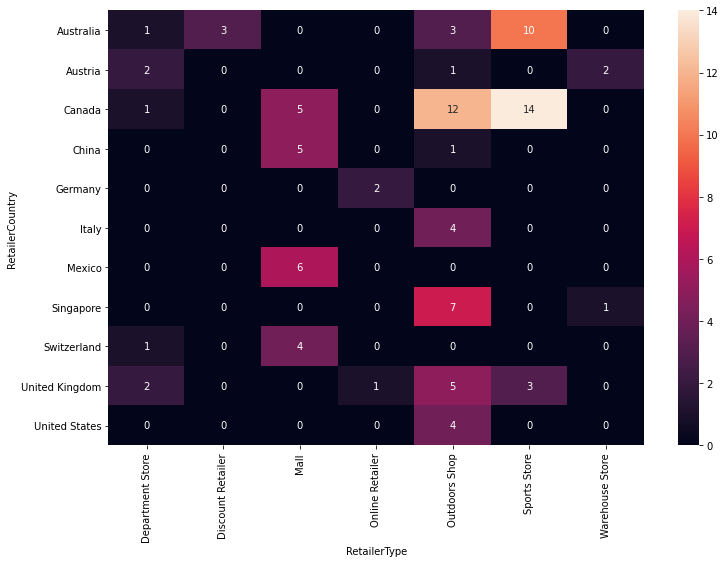

In [98]:
plt.figure(figsize=(12,8))
sns.heatmap(pd.crosstab(index= df['RetailerCountry'], columns= df['RetailerType']), annot= True)

<AxesSubplot:xlabel='offsetUTC', ylabel='RetailerType'>

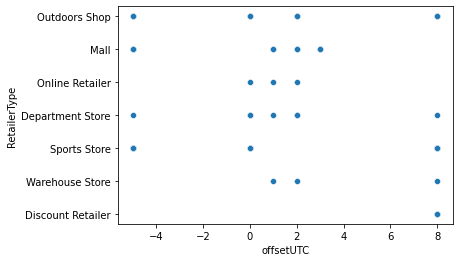

In [102]:
sns.scatterplot(data= df, x= 'offsetUTC', y= 'RetailerType')

In [104]:
df.groupby(['offsetUTC','RetailerType'], as_index= False).aggregate({'Product':'count'})

,offsetUTC,RetailerType,Product
0,-5.0,Department Store,1
1,-5.0,Mall,9
2,-5.0,Outdoors Shop,16
3,-5.0,Sports Store,14
4,0.0,Department Store,2
5,0.0,Online Retailer,1
6,0.0,Outdoors Shop,5
7,0.0,Sports Store,3
8,1.0,Department Store,1
9,1.0,Mall,3


In [106]:
df.head()

,RetailerCountry,MOS_UTC,MOS,TimeZone,offsetUTC,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,,
SaleID_1,United States,2020-06-02 04:20:56+00:00,2020-06-01 23:20:56,EST,-5.0,Outdoors Shop,TrailChef Deluxe Cook Set,200.0
SaleID_2,United States,2020-05-02 22:27:08+00:00,2020-05-02 17:27:08,EST,-5.0,Outdoors Shop,TrailChef Double Flame,7.0
SaleID_3,United States,2020-10-30 14:04:43+00:00,2020-10-30 09:04:43,EST,-5.0,Outdoors Shop,Star Dome,20.0
SaleID_4,United States,2020-11-13 09:25:06+00:00,2020-11-13 04:25:06,EST,-5.0,Outdoors Shop,Star Gazer 2,40.0
SaleID_5,Italy,2020-06-12 09:15:47+00:00,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.5


In [111]:
total_sales = df.groupby(['TimeZone']).agg({'Sales Revenue ($)':'sum'}).sort_values('Sales Revenue ($)', ascending=False)

<AxesSubplot:xlabel='TimeZone', ylabel='Sales Revenue ($)'>

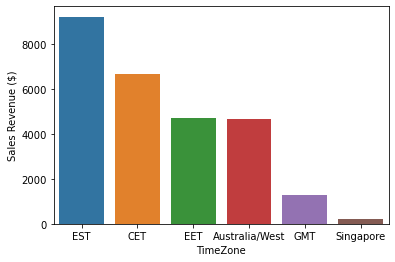

In [112]:
sns.barplot(x= total_sales.index, y= total_sales['Sales Revenue ($)'])

In [113]:
avg_sales = df.groupby(['TimeZone']).agg({'Sales Revenue ($)':'mean'}).sort_values('Sales Revenue ($)', ascending=False)

<AxesSubplot:xlabel='TimeZone', ylabel='Sales Revenue ($)'>

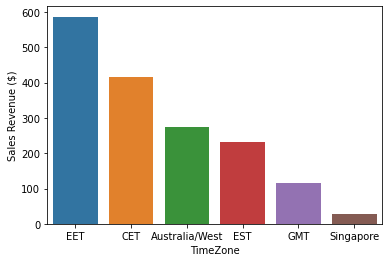

In [115]:
sns.barplot(x= avg_sales.index, y= avg_sales['Sales Revenue ($)'])